In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = (train_images, train_labels), (test_images, test_labels)

class_names = ['0','1','2','3','4','5','6','7','8','9']
NUM_CLASSES = 10

converted y.shape =  (60000, 10)


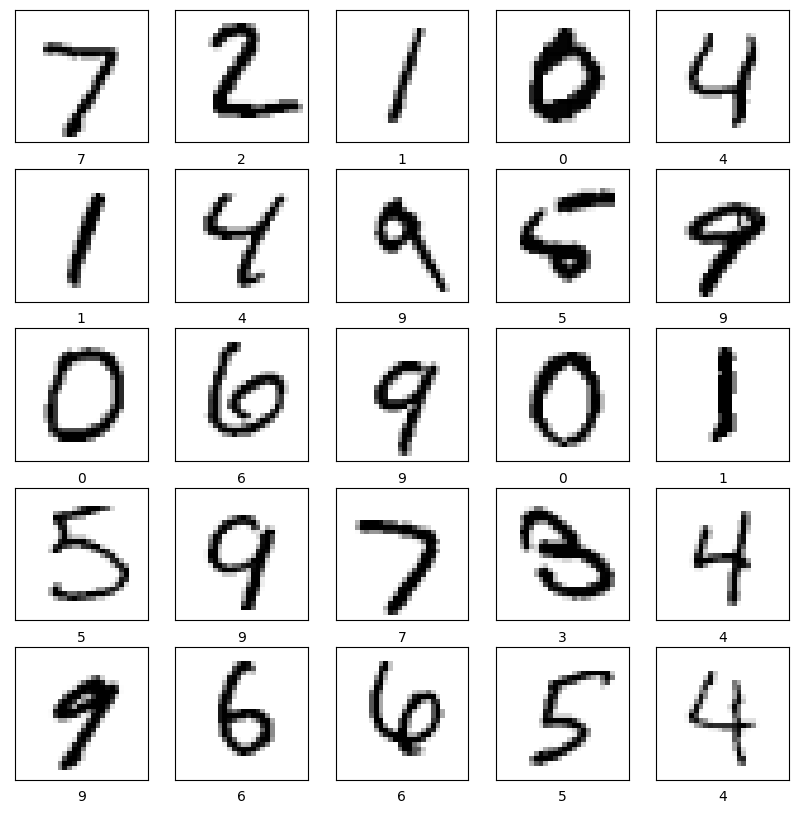

In [4]:
from tensorflow.keras.utils import to_categorical

x_train = x_train/255
x_test = x_test/255

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)
print("converted y.shape = ", y_train.shape)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i].argmax()])

In [5]:
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_layer = Input((28,28))
x = Flatten()(input_layer)
x = Dense(128, activation = 'relu')(x)
output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)
model = Model(input_layer, output_layer)

In [6]:
from tensorflow.keras.layers import Flatten, Dense

model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


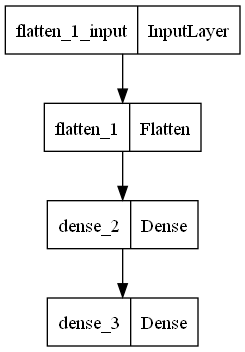

In [8]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [9]:
model.compile(optimizer='sgd',
             loss='mse',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 784us/step - loss: 0.0867 - accuracy: 0.2427
Epoch 2/10
1875/1875 [==============================] - 1s 788us/step - loss: 0.0763 - accuracy: 0.5026
Epoch 3/10
1875/1875 [==============================] - 1s 783us/step - loss: 0.0630 - accuracy: 0.6766
Epoch 4/10
1875/1875 [==============================] - 1s 775us/step - loss: 0.0502 - accuracy: 0.7391
Epoch 5/10
1875/1875 [==============================] - 1s 774us/step - loss: 0.0420 - accuracy: 0.7672
Epoch 6/10
1875/1875 [==============================] - 1s 779us/step - loss: 0.0365 - accuracy: 0.7876
Epoch 7/10
1875/1875 [==============================] - 1s 780us/step - loss: 0.0319 - accuracy: 0.8256
Epoch 8/10
1875/1875 [==============================] - 1s 769us/step - loss: 0.0284 - accuracy: 0.8477
Epoch 9/10
1875/1875 [==============================] - 1s 769us/step - loss: 0.0260 - accuracy: 0.8587
Epoch 10/10
1875/1875 [==============================] - 1s 774u

In [11]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 633us/step - loss: 0.0223 - accuracy: 0.8772


In [12]:
predictions = model.predict(x_test)

313/313 [==============================] - 0s 568us/step


In [13]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label]),
                                  color = color)
            
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')    

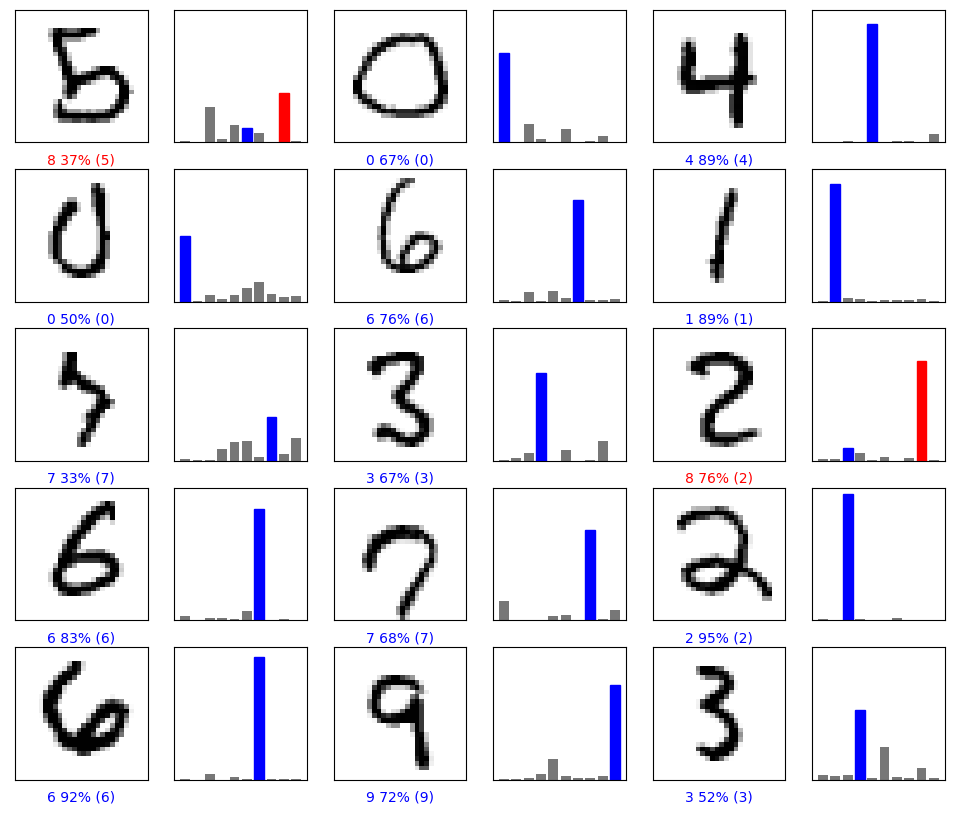

In [15]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+720, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+720, predictions, test_labels)
    
plt.show()